In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing

In [2]:
df = pd.read_csv("final_merge_data.csv")

In [3]:
df.columns

Index(['Country Name', 'Series Name', '2000 [YR2000]', '2001 [YR2001]',
       '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]',
       '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]',
       '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
       '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
       '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]',
       '2022 [YR2022]'],
      dtype='object')

#### Removing the last 3 years of data as we only analyze the data till year 2019

In [4]:
df = df.iloc[:, :-3]

In [5]:
df.columns = [col.split('[')[0].strip() for col in df.columns]

In [6]:
# Having a look at the dataset format
df.head()

,Country Name,Series Name,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,Access to clean fuels and technologies for coo...,6.7,7.7,8.8,10,11.1,12.5,13.9,15.3,...,19.7,21.3,22.7,24.3,25.7,27.25,28.5,30,31.1,32.45
1,Afghanistan,Access to clean fuels and technologies for coo...,1.1,1.4,1.6,1.9,2.3,2.7,3.3,3.8,...,6,7,7.9,8.9,9.9,10.9,12.1,13.2,14.3,15.5
2,Afghanistan,Access to clean fuels and technologies for coo...,30.5,34.4,38.6,43.2,47.4,51.7,55.7,59.6,...,69.05,71.6,74,75.8,77.6,78.9,80.7,81.6,82.7,83.5
3,Afghanistan,Access to electricity (% of population),4.44689083099365,9.29452705383301,14.1336164474487,18.9711647033691,23.8141822814941,28.6696720123291,33.5444183349609,38.4400024414063,...,42.7,43.2220189082037,69.1,68.0408782958984,89.5,71.5,97.7,97.7,93.4308776855469,97.7
4,Afghanistan,"Access to electricity, rural (% of rural popul...",..,..,..,2.13041009323948,7.84279549013813,15.3556428763825,19.2648207623049,25.0363981560141,...,30.218801811679,29.5728809074145,60.8491566005698,60.2391977225107,86.5005116269173,64.5733543829493,97.0993598284929,97.0919732482142,91.6060600230095,97.0756269501314


In [7]:
# In the WDI dataset, null values are represented as '..', so we replace them by the default Pandas NA value, 
# for convenience of analysis
df.replace('..', pd.NA, inplace=True)

##### Changing some country names for universal commonality

In [8]:
replace_dict = {'Viet Nam': 'Vietnam', 'Egypt, Arab Rep.': 'Egypt', 'Yemen, Rep.': 'Yemen', 'Russian Federation': 'Russia',
               'Turkiye' : 'Turkey', 'Korea, Rep.': 'South Korea'}
df['Country Name'].replace(replace_dict, inplace=True)

## Calculating percentage of NA values at country level across all indicators and years

In [9]:
# Function to calculate the percentage of NA values in a column
def percentage_na(column):
    return column.isna().mean() * 100

In [10]:
columns_to_exclude = ['Country Name', 'Series Name']
columns_of_interest = [col for col in df.columns if col not in columns_to_exclude]

na_percentage_by_country = df.groupby('Country Name')[columns_of_interest].apply(lambda x: x.isna().mean()) * 100

In [11]:
na_percentage_by_country.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,
Afghanistan,70.412999,74.001354,66.350711,63.710223,61.069736,60.392688,53.419093,49.424509,44.278944,46.174678,43.601896,40.555179,42.383209,42.789438,38.659445,38.253216,41.164523,38.591740,41.976980,48.138118
Africa Eastern and Southern,55.924171,58.158429,58.090724,57.278267,56.330399,53.283683,53.622207,52.945159,53.283683,52.335816,49.898443,52.064997,50.778605,51.523358,50.033852,50.304672,51.658768,52.809749,51.455653,51.861882
Africa Western and Central,56.330399,58.700068,58.023020,57.210562,57.887610,53.757617,53.215978,52.335816,52.403521,52.809749,49.695328,52.132701,51.184834,51.794177,50.101557,50.372376,51.726473,52.606635,51.455653,51.997292
Albania,37.846987,42.247800,35.951253,37.643873,36.831415,30.737982,37.982397,34.123223,28.774543,30.805687,28.300609,27.149628,23.899797,27.420447,27.758971,27.962085,28.706838,24.373731,25.660122,30.196344
Algeria,42.924848,47.664184,43.127962,43.669601,43.263372,35.477319,33.310765,34.529452,35.409614,35.680433,34.326337,35.409614,35.409614,36.018957,33.920108,34.732566,35.748138,33.987813,37.982397,37.846987


In [12]:
mean_na_percentage_by_country = na_percentage_by_country.mean(axis=1)
mean_na_percentage_by_country.head()

Country Name
Afghanistan                    50.267434
Africa Eastern and Southern    53.182126
Africa Western and Central     53.287068
Albania                        31.218687
Algeria                        37.522004
dtype: float64

### Calculating mean NA% values for each of the 4 income levels

First we import the classification of the countries based on income level, published by the World Bank Group.

In [13]:
income_level_df = pd.read_excel("income_classification.xlsx")
income_level_df = income_level_df[['Economy', 'Income group']]
# Changing some country names for convenience
income_level_df['Economy'].replace(replace_dict, inplace=True)

In [14]:
# Seeing how the dataframe looks like
income_level_df.head()

,Economy,Income group
0,Aruba,High income
1,Afghanistan,Low income
2,Angola,Lower middle income
3,Albania,Upper middle income
4,Andorra,High income


Now lets create the list of countries belonging to each income level.

In [15]:
high_income_countries = income_level_df[income_level_df['Income group'] == 'High income']['Economy']
high_income_countries.replace({'Curaçao': 'Curacao'}, inplace=True)
high_income_countries = high_income_countries[high_income_countries != 'Taiwan, China']
print("No of high income countries:" + str(len(high_income_countries)))

upper_middle_income_countries = income_level_df[income_level_df['Income group'] == 'Upper middle income']['Economy']
upper_middle_income_countries.replace({'Türkiye': 'Turkey'}, inplace=True)
print("No of upper middle income countries:" + str(len(upper_middle_income_countries)))

lower_middle_income_countries = income_level_df[income_level_df['Income group'] == 'Lower middle income']['Economy']
lower_middle_income_countries.replace({"Côte d’Ivoire": "Cote d'Ivoire", "São Tomé and Príncipe" : "Sao Tome and Principe"}, inplace=True)
print("No of lower middle income countries:" + str(len(upper_middle_income_countries)))

low_income_countries = income_level_df[income_level_df['Income group'] == 'Low income']['Economy']
print("No of low income countries:" + str(len(low_income_countries)))

No of high income countries:82
No of upper middle income countries:54
No of lower middle income countries:54
No of low income countries:26


/var/folders/fm/jxt3g9_s4ps7mv9cq1d2f2h80000gn/T/ipykernel_93189/3824968739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_income_countries.replace({'Curaçao': 'Curacao'}, inplace=True)
/var/folders/fm/jxt3g9_s4ps7mv9cq1d2f2h80000gn/T/ipykernel_93189/3824968739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upper_middle_income_countries.replace({'Türkiye': 'Turkey'}, inplace=True)
/var/folders/fm/jxt3g9_s4ps7mv9cq1d2f2h80000gn/T/ipykernel_93189/3824968739.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

Now lets calculate and plot the mean NA percentage for all the income categories.

In [16]:
hi_mean_na_percentage_by_country = mean_na_percentage_by_country[high_income_countries]
#print(hi_mean_na_percentage_by_country)
print(hi_mean_na_percentage_by_country.mean())
print(hi_mean_na_percentage_by_country.median())

52.16754462737586
43.08395396073121


In [17]:
umi_mean_na_percentage_by_country = mean_na_percentage_by_country[upper_middle_income_countries]
#print(umi_mean_na_percentage_by_country)
print(umi_mean_na_percentage_by_country.mean())
print(umi_mean_na_percentage_by_country.median())
umi_val = umi_mean_na_percentage_by_country.median()

38.86205772461696
34.258632362897764


In [18]:
lmi_mean_na_percentage_by_country = mean_na_percentage_by_country[lower_middle_income_countries]
#print(lmi_mean_na_percentage_by_country)
print(lmi_mean_na_percentage_by_country.mean())
print(lmi_mean_na_percentage_by_country.median())
lmi_val = lmi_mean_na_percentage_by_country.median()

37.871436094184915
37.256262694651326


In [19]:
li_mean_na_percentage_by_country = mean_na_percentage_by_country[low_income_countries]
#print(li_mean_na_percentage_by_country)
print(li_mean_na_percentage_by_country.mean())
print(li_mean_na_percentage_by_country.median())
li_val = li_mean_na_percentage_by_country.median()

44.635045049737
41.17637102234258


By comparing the mean and median of the different income levels, we notice there are outliers in the high income sample, which skew the metrics a lot. These are primarily small island nations with very less population. So let us use outlier detection to remove them.

<Axes: ylabel='Frequency'>

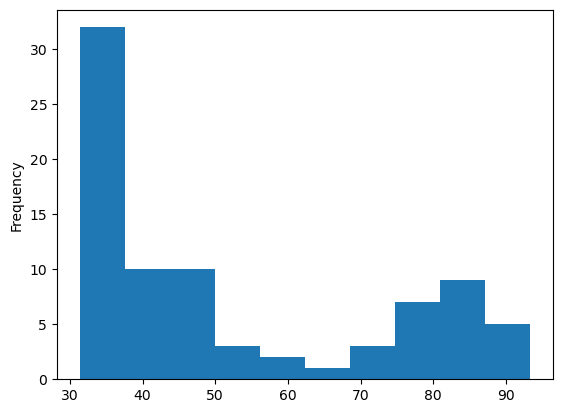

In [20]:
hi_mean_na_percentage_by_country.plot.hist()

<Axes: ylabel='Frequency'>

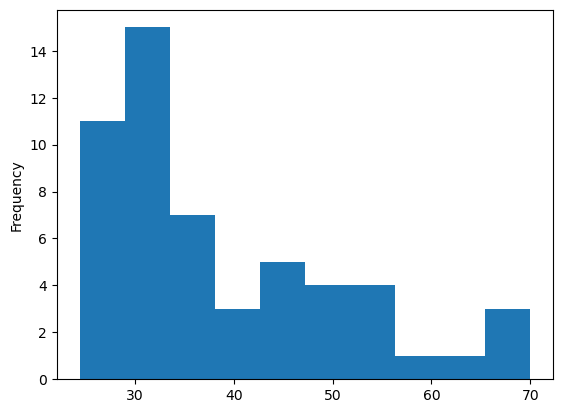

In [21]:
umi_mean_na_percentage_by_country.plot.hist()

<Axes: ylabel='Frequency'>

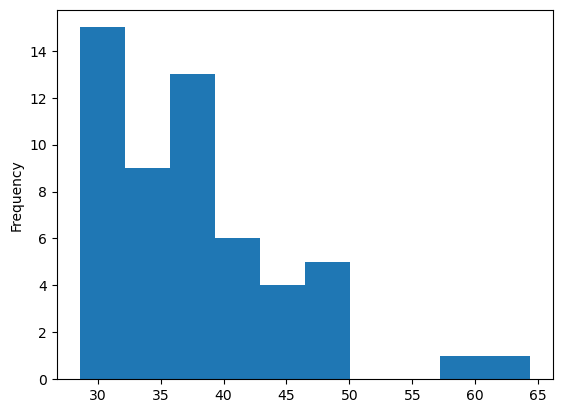

In [22]:
lmi_mean_na_percentage_by_country.plot.hist()

<Axes: ylabel='Frequency'>

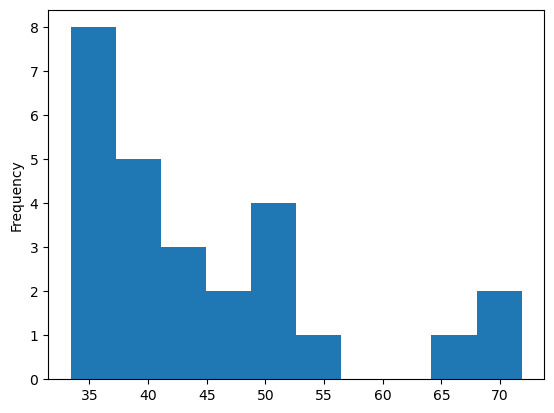

In [23]:
li_mean_na_percentage_by_country.plot.hist()

As we see, there are a significant no of clear outliers in the high income category, therefore filtering out those with value above 70.

In [24]:
hi_income_outliers = hi_mean_na_percentage_by_country[hi_mean_na_percentage_by_country >= 70]

In [25]:
hi_income_outliers

Country Name
Andorra                      75.121869
American Samoa               83.967502
Bermuda                      71.814489
Channel Islands              88.930264
Curacao                      83.087339
Cayman Islands               78.730535
Faroe Islands                82.315504
Gibraltar                    87.423832
Greenland                    79.573460
Guam                         80.575491
Isle of Man                  89.570074
Liechtenstein                80.978334
St. Martin (French part)     93.361544
Monaco                       83.598510
Northern Mariana Islands     88.246445
New Caledonia                76.367637
Nauru                        74.478673
French Polynesia             78.182126
San Marino                   76.083277
Sint Maarten (Dutch part)    86.225457
Turks and Caicos Islands     82.139472
British Virgin Islands       85.433311
Virgin Islands (U.S.)        81.726473
dtype: float64

As we can see, all the outlier are very small island-countries with extremely low population, and very small economy size. So we remove them from the analysis in order to remove skew from the results.

In [26]:
hi_val = hi_mean_na_percentage_by_country[hi_mean_na_percentage_by_country < 70].median()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) in

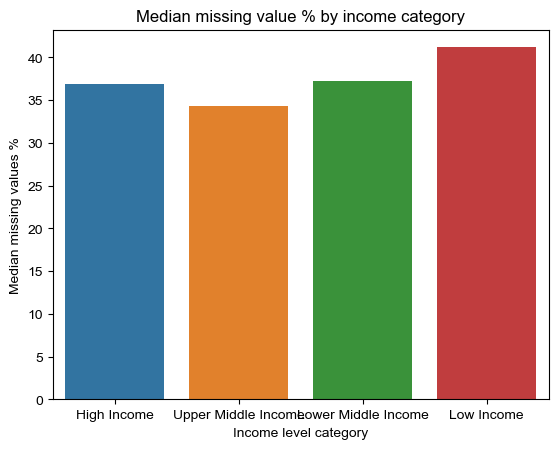

In [27]:
x_arr = ['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income']
y_arr = [hi_val, umi_val, lmi_val, li_val]

na_value_graph = sns.barplot(x = x_arr, y = y_arr)
na_value_graph.set(xlabel = 'Income level category')
na_value_graph.set(ylabel = 'Median missing values %')
na_value_graph.set(title = 'Median missing value % by income category')
sns.set_theme(font_scale=0.5)

In [28]:
hi_income_excluding_outliers = hi_mean_na_percentage_by_country[hi_mean_na_percentage_by_country < 70]
umi_income_excluding_outliers = umi_mean_na_percentage_by_country[umi_mean_na_percentage_by_country < 60]
lmi_income_excluding_outliers = lmi_mean_na_percentage_by_country[lmi_mean_na_percentage_by_country < 55]
li_income_excluding_outliers = li_mean_na_percentage_by_country[li_mean_na_percentage_by_country < 65]

In [29]:
def remove_outliers(l1,l2):
  new_list = []
  for i in l1:
    if i in l2:
      new_list.append(i)
  return new_list

In [30]:
hi_income_excluding_outliers_list = remove_outliers(high_income_countries,hi_income_excluding_outliers)
umi_income_excluding_outliers_list = remove_outliers(upper_middle_income_countries,umi_income_excluding_outliers)
lmi_income_excluding_outliers_list = remove_outliers(lower_middle_income_countries,lmi_income_excluding_outliers)
li_income_excluding_outliers_list = remove_outliers(low_income_countries,li_income_excluding_outliers)

Here's a sample of 12 countries distributed across geography and income levels:

United States (North America, High-income)
Brazil (South America, Upper-middle-income)
Nigeria (Africa, Lower-middle-income)
China (Asia, Upper-middle-income)
India (Asia, Lower-middle-income)
United Kingdom (Europe, High-income)
South Africa (Africa, Upper-middle-income)
Australia (Oceania, High-income)
Mexico (North America, Upper-middle-income)
Japan (Asia, High-income)
Vietnam (Asia, Lower-middle-income)
Germany (Europe, High-income)


This selection includes countries from various continents and represents a mix of high-income and upper-middle-income, as well as lower-middle-income countries.

## Calculating no of indicators with null values at country level

#### Economic Indicators:

>GDP (Gross Domestic Product)

>GNI (Gross National Income)

>Inflation rate

>Employment rate

>Trade balance


#### Health Indicators:

>Life expectancy

>Infant mortality rate

>Health expenditure as a percentage of GDP

>Access to clean water and sanitation

#### Environmental Indicators:

>CO2 emissions

>Forest area

>Biodiversity

>Access to clean energy

>Water resources and quality

#### Governance and Institutions:

>Political stability

>Corruption perception index

>Rule of law index

>Regulatory quality

#### Infrastructure:

>Road and rail infrastructure

>Electricity access

>Internet and mobile phone penetration

>Urbanization rate

#### Poverty and Inequality:

>Poverty rate

>Income inequality (Gini coefficient)

>Social assistance programs

#### Demographic Indicators:

>Population growth rate

>Age distribution

>Migration rate

#### Health and Nutrition:

>Malnutrition rates

>Disease prevalence (e.g., HIV/AIDS, malaria)

>Healthcare access and quality

#### Education:

>Literacy rate

>School enrollment rates

>Education expenditure as a percentage of GDP

#### Labor and Employment:

>Unemployment rate

>Labor force participation rate

>Informal employment rate

#### Trade and Globalization:

>Imports and exports

>Foreign direct investment (FDI)

>Global competitiveness index

In [31]:
# Economic Indicators
economic_indicators = ['GDP per capita (current US$)', 'GNI (current US$)', 'Inflation, consumer prices (annual %)', 'Unemployment', 'Net trade in goods (BoP, current US$)']

# Health Indicators
health_indicators = ['Life expectancy at birth, total (years)', 'Mortality rate, infant (per 1,000 live births)', 'People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)']

# Environmental Indicators
environmental_indicators = ['Adjusted savings: carbon dioxide damage (% of GNI)', 'Adjusted savings: net forest depletion (% of GNI)', 'Biodiversity index', 'Fossil fuel energy consumption (% of total)', 'Renewable energy consumption (% of total final energy consumption)', 'Renewable internal freshwater resources per capita (cubic meters)']

# Governance and Institutions
governance_indicators = ['Political Stability and Absence of Violence/Terrorism: Estimate', 'Control of Corruption: Estimate', 'Rule of Law: Estimate', 'Regulatory Quality: Estimate']

# Infrastructure
infrastructure_indicators = ['Road density', 'Access to electricity (% of population)', 'Mobile cellular subscriptions', 'Urban population (% of total population)']

# Poverty and Inequality
poverty_indicators = ['Multidimensional poverty headcount ratio (% of total population)', 'Rural population (% of total population)', 'Gini index', 'Coverage of social insurance programs (% of population)']

# Demographic Indicators
demographic_indicators = ['Population growth (annual %)', 'Population ages 15-64 (% of total population)', 'Population ages 65 and above (% of total population)', 'Net migration']

# Education
education_indicators = ['Literacy rate, adult total (% of people ages 15 and above)', 'School enrollment', 'Adjusted savings: education expenditure (% of GNI)']

# Labor and Employment
labor_indicators = ['Unemployment with basic education (% of total labor force with basic education)', 'Labor force participation rate, total (% of total population ages 15+) (national estimate)', 'Informal employment rate']

# Trade and Globalization
trade_indicators = ['Total reserves in months of imports', 'Foreign direct investment, net inflows (% of GDP)', 'Global competitiveness index']

In [32]:
def get_df(indicators_list):
  df_high_income = df[df['Country Name'].isin(hi_income_excluding_outliers_list) & df['Series Name'].isin(indicators_list)]
  df_umi_income = df[df['Country Name'].isin(umi_income_excluding_outliers_list) & df['Series Name'].isin(indicators_list)]
  df_lmi_income = df[df['Country Name'].isin(lmi_income_excluding_outliers_list) & df['Series Name'].isin(indicators_list)]
  df_low_income = df[df['Country Name'].isin(li_income_excluding_outliers_list) & df['Series Name'].isin(indicators_list)]
  return df_high_income,df_umi_income,df_lmi_income,df_low_income

In [33]:
def count_non_zero(row):
    return row[row != 0].count()-2

In [34]:
def find_empty_indicator_values(df):
  count = []
  series = df['Series Name'].unique()
  new_df = df.groupby(['Country Name','Series Name'])
  new_df = new_df.apply(lambda x: 1-x.isna().sum())
  new_df['Count'] = new_df.apply(count_non_zero, axis=1)
  new_df = new_df.drop(df.columns[:2], axis=1)
  count = new_df.groupby('Series Name')['Count'].mean()

  return count

In [35]:
def plot_series(l1,l2,l3,l4):
  length = min(4,len(l1.keys()))
  fig, axes = plt.subplots(nrows = length,ncols = 1,figsize=(10,15))
  fig.subplots_adjust(hspace = 0.5,wspace = 0.5)
  axes = axes.flatten()
  bar_width = 0.5
  color= plt.cm.viridis.colors
  bar_positions = np.arange(1)
  for ax,i in zip(axes,range(length)):
    series_name = l1.keys()[i]
    ax.bar(bar_positions - 1.5 * bar_width, l1.loc[series_name], width=0.4, label='High Income',color=color[0])
    ax.bar(bar_positions - 0.5 * bar_width, l2.loc[series_name],width=0.4, label='Upper Middle Income',color=color[64])
    ax.bar(bar_positions + 0.5 * bar_width, l3.loc[series_name], width=0.4, label='Lower Middle Income',color=color[128])
    ax.bar(bar_positions + 1.5 * bar_width, l4.loc[series_name], width=0.4, label='Low Income',color=color[192])

    ax.set_xticks(bar_positions)
    ax.set_ylabel('Number of Years of data collected')
    ax.set_xlabel(series_name)
    ax.legend(fontsize='6')

  plt.tight_layout()
  plt.show()

Comparing all indicators in the given categories acroos the 4 income classification given by the World Bank


In [36]:
df_high_income,df_umi_income,df_lmi_income,df_low_income = get_df(economic_indicators)
indicator_values_high_income_economic = find_empty_indicator_values(df_high_income)
indicator_values_umi_income_economic = find_empty_indicator_values(df_umi_income)
indicator_values_lmi_income_economic = find_empty_indicator_values(df_lmi_income)
indicator_values_low_income_economic = find_empty_indicator_values(df_low_income)

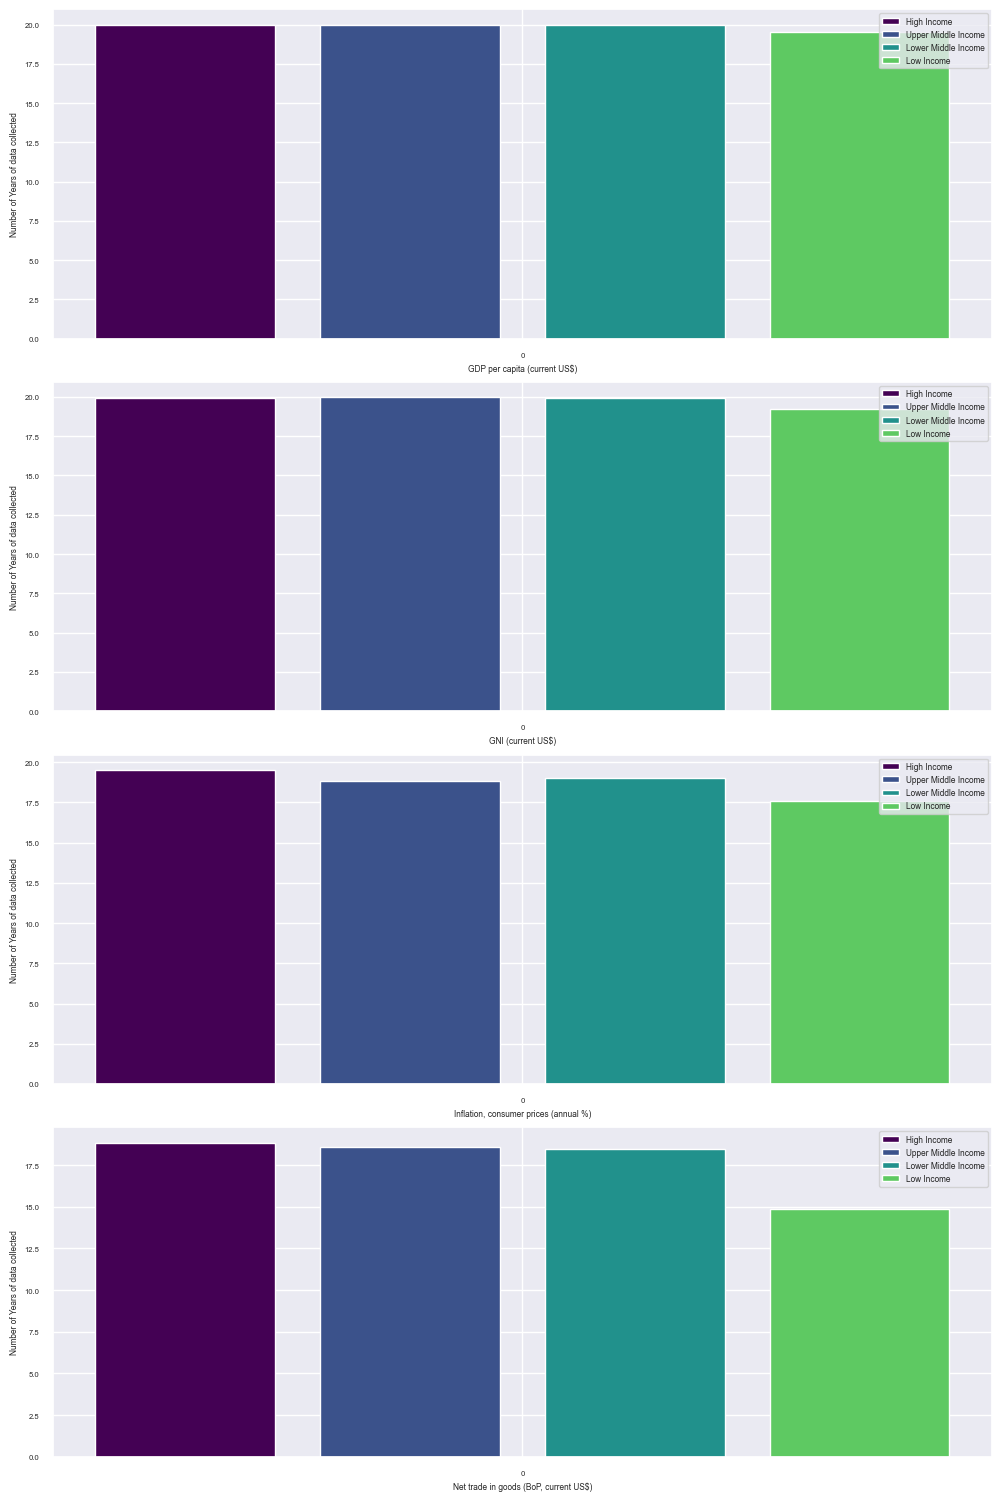

In [37]:
plot_series(indicator_values_high_income_economic,indicator_values_umi_income_economic,indicator_values_lmi_income_economic,indicator_values_low_income_economic)

In [38]:
df_high_income,df_umi_income,df_lmi_income,df_low_income = get_df(health_indicators)
average_indicator_values_high_income_health = find_empty_indicator_values(df_high_income)
average_indicator_values_umi_income_health = find_empty_indicator_values(df_umi_income)
average_indicator_values_lmi_income_health = find_empty_indicator_values(df_lmi_income)
average_indicator_values_low_income_health = find_empty_indicator_values(df_low_income)

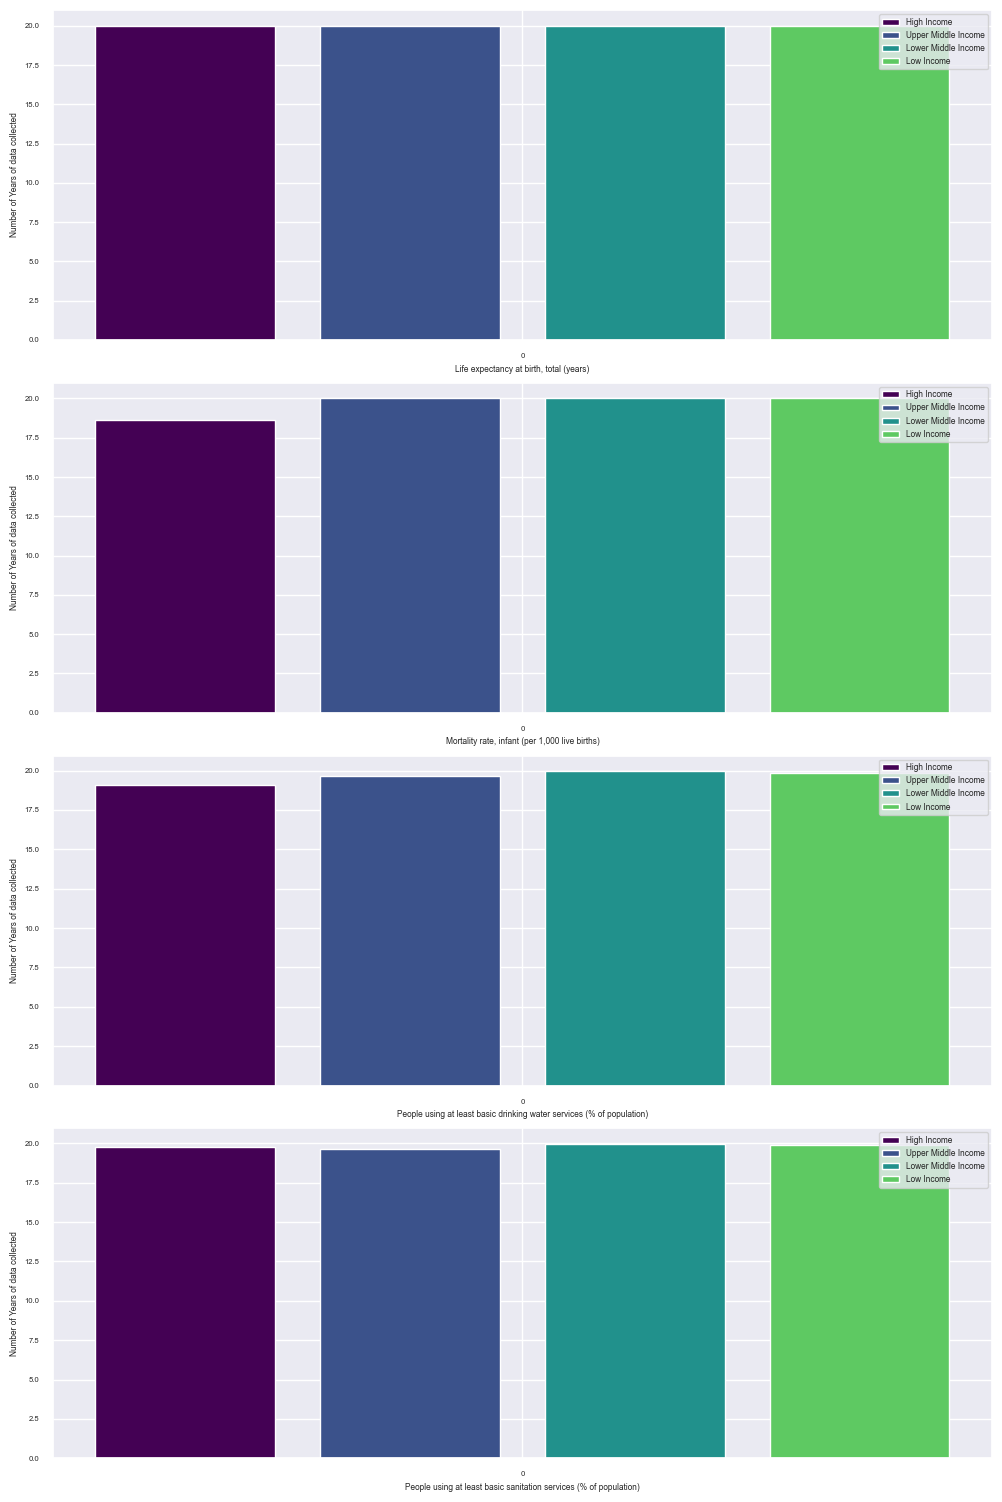

In [39]:
plot_series(average_indicator_values_high_income_health,average_indicator_values_umi_income_health,average_indicator_values_lmi_income_health,average_indicator_values_low_income_health)

In [40]:
df_high_income,df_umi_income,df_lmi_income,df_low_income = get_df(environmental_indicators)
average_indicator_values_high_income_environmental = find_empty_indicator_values(df_high_income)
average_indicator_values_umi_income_environmental = find_empty_indicator_values(df_umi_income)
average_indicator_values_lmi_income_environmental = find_empty_indicator_values(df_lmi_income)
average_indicator_values_low_income_environmental = find_empty_indicator_values(df_low_income)

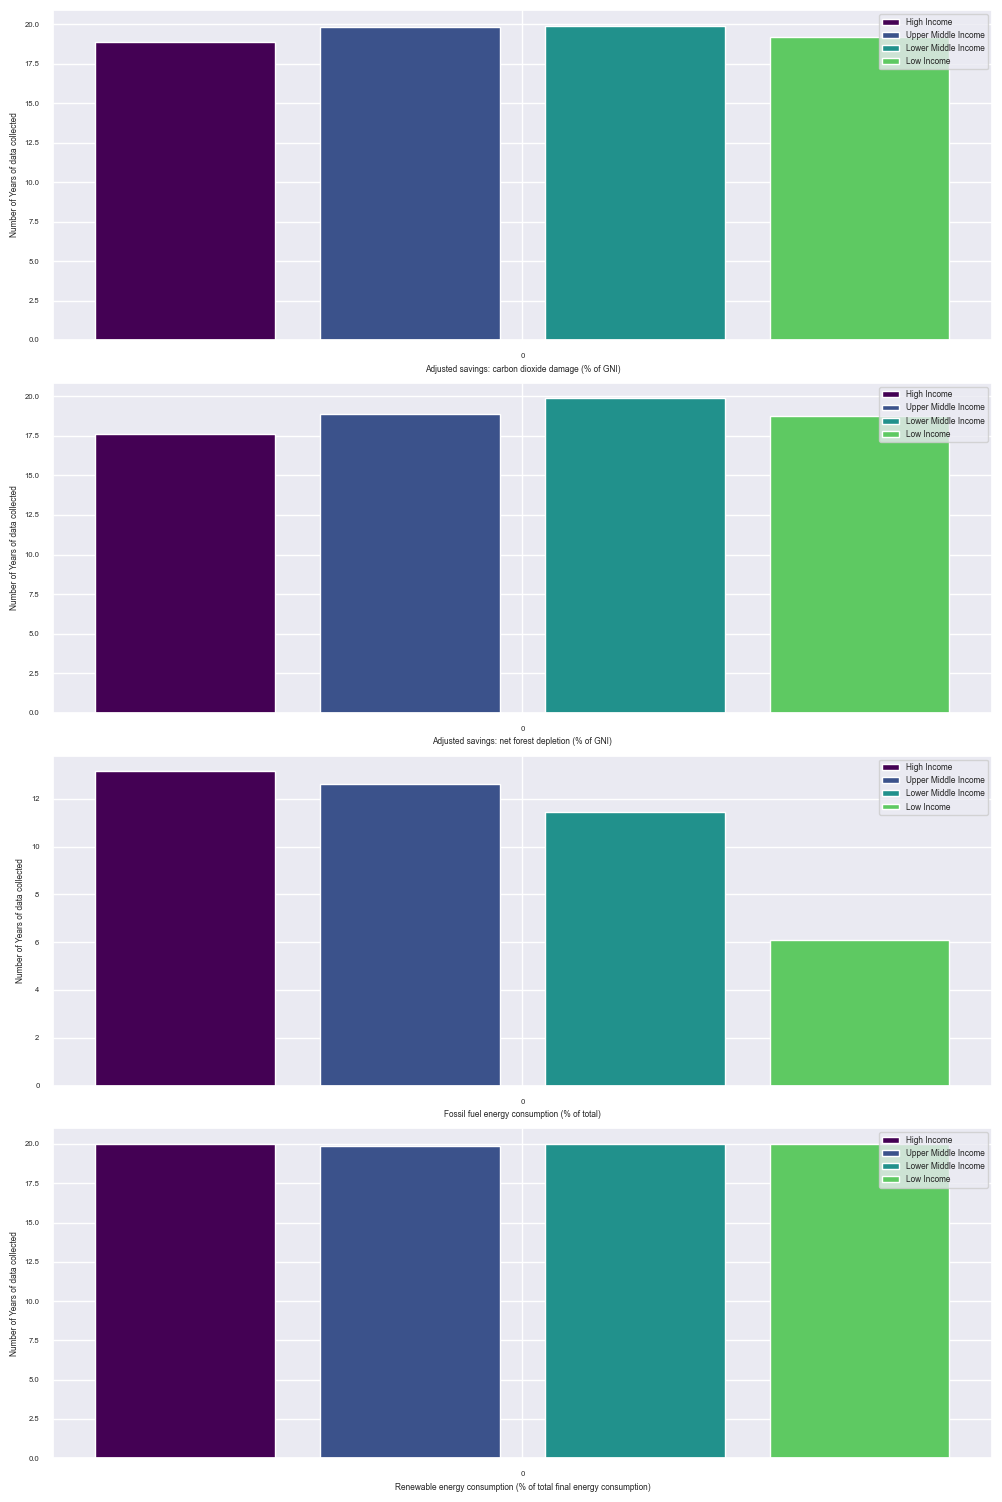

In [41]:
plot_series(average_indicator_values_high_income_environmental,average_indicator_values_umi_income_environmental,average_indicator_values_lmi_income_environmental,average_indicator_values_low_income_environmental)

In [42]:
df_high_income,df_umi_income,df_lmi_income,df_low_income = get_df(governance_indicators)
average_indicator_values_high_income_governance = find_empty_indicator_values(df_high_income)
average_indicator_values_umi_income_governance = find_empty_indicator_values(df_umi_income)
average_indicator_values_lmi_income_governance = find_empty_indicator_values(df_lmi_income)
average_indicator_values_low_income_governance = find_empty_indicator_values(df_low_income)

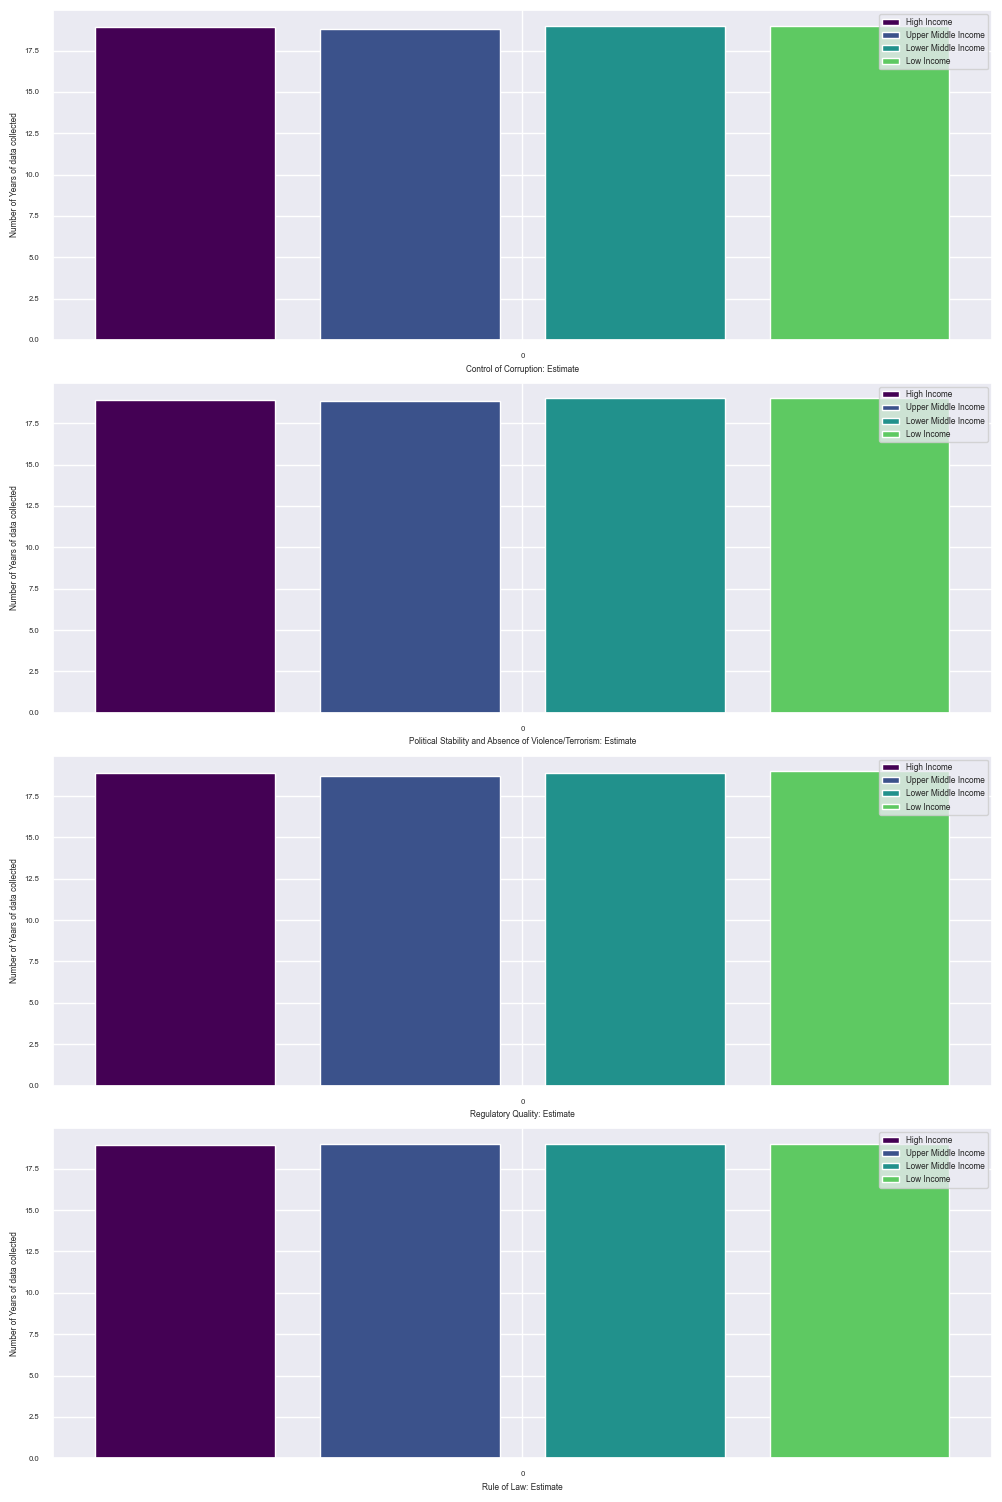

In [43]:
plot_series(average_indicator_values_high_income_governance,average_indicator_values_umi_income_governance,average_indicator_values_lmi_income_governance,average_indicator_values_low_income_governance)

In [44]:
df_high_income,df_umi_income,df_lmi_income,df_low_income = get_df(infrastructure_indicators)
average_indicator_values_high_income_infrastructure = find_empty_indicator_values(df_high_income)
average_indicator_values_umi_income_infrastructure = find_empty_indicator_values(df_umi_income)
average_indicator_values_lmi_income_infrastructure = find_empty_indicator_values(df_lmi_income)
average_indicator_values_low_income_infrastructure = find_empty_indicator_values(df_low_income)

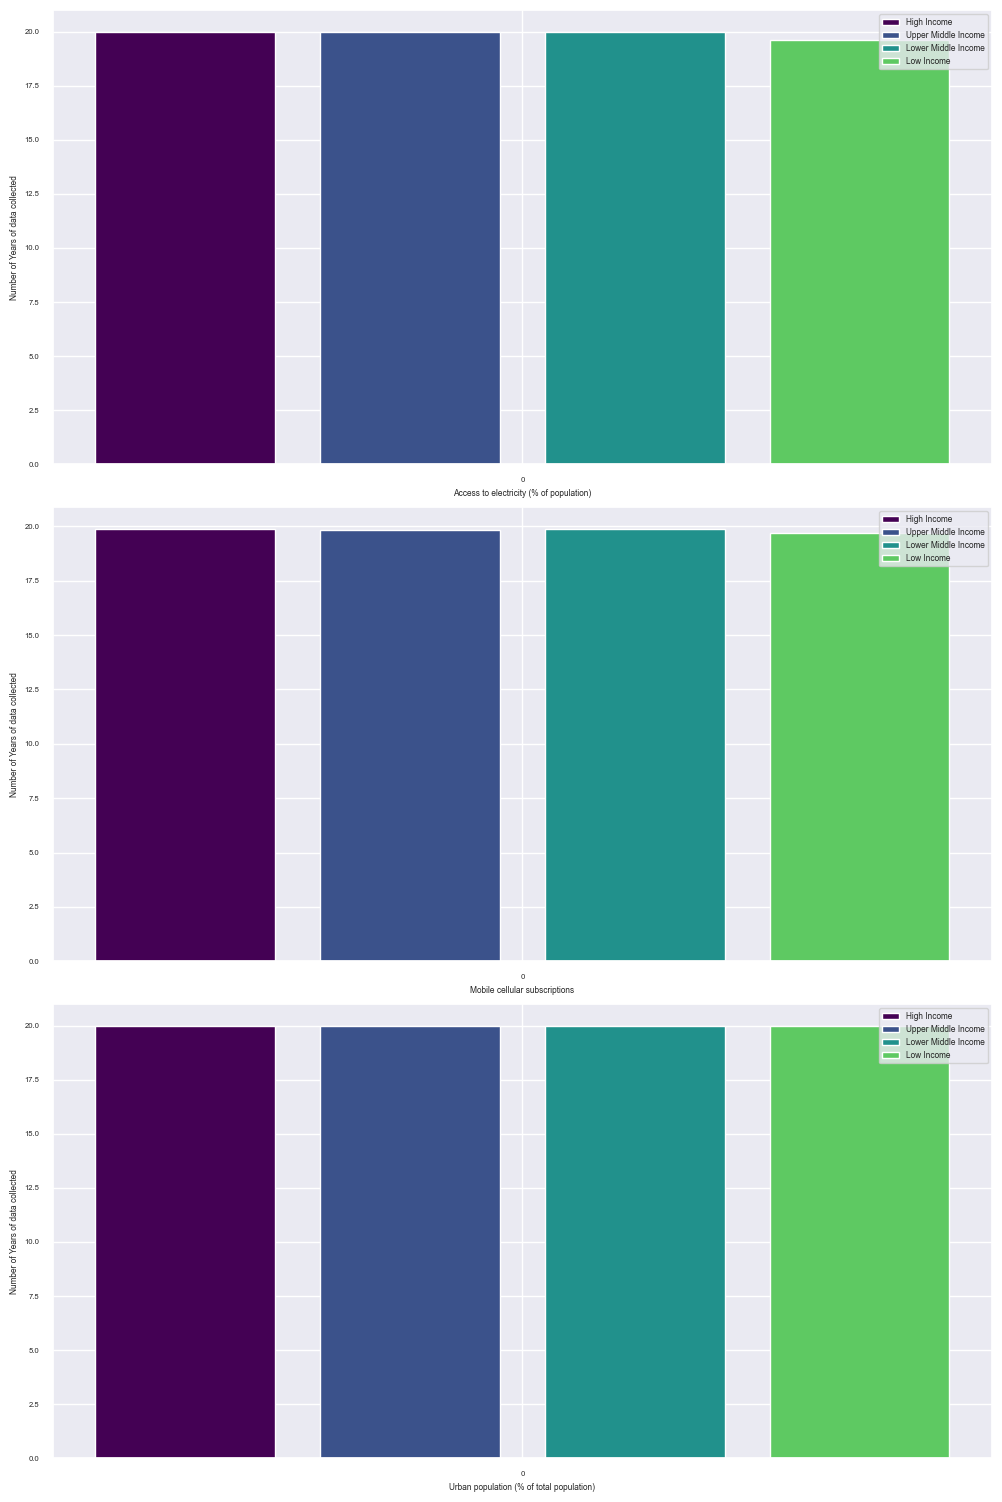

In [45]:
plot_series(average_indicator_values_high_income_infrastructure,average_indicator_values_umi_income_infrastructure,average_indicator_values_lmi_income_infrastructure,average_indicator_values_low_income_infrastructure)

In [46]:
df_high_income,df_umi_income,df_lmi_income,df_low_income = get_df(poverty_indicators)
average_indicator_values_high_income_poverty = find_empty_indicator_values(df_high_income)
average_indicator_values_umi_income_poverty = find_empty_indicator_values(df_umi_income)
average_indicator_values_lmi_income_poverty = find_empty_indicator_values(df_lmi_income)
average_indicator_values_low_income_poverty = find_empty_indicator_values(df_low_income)

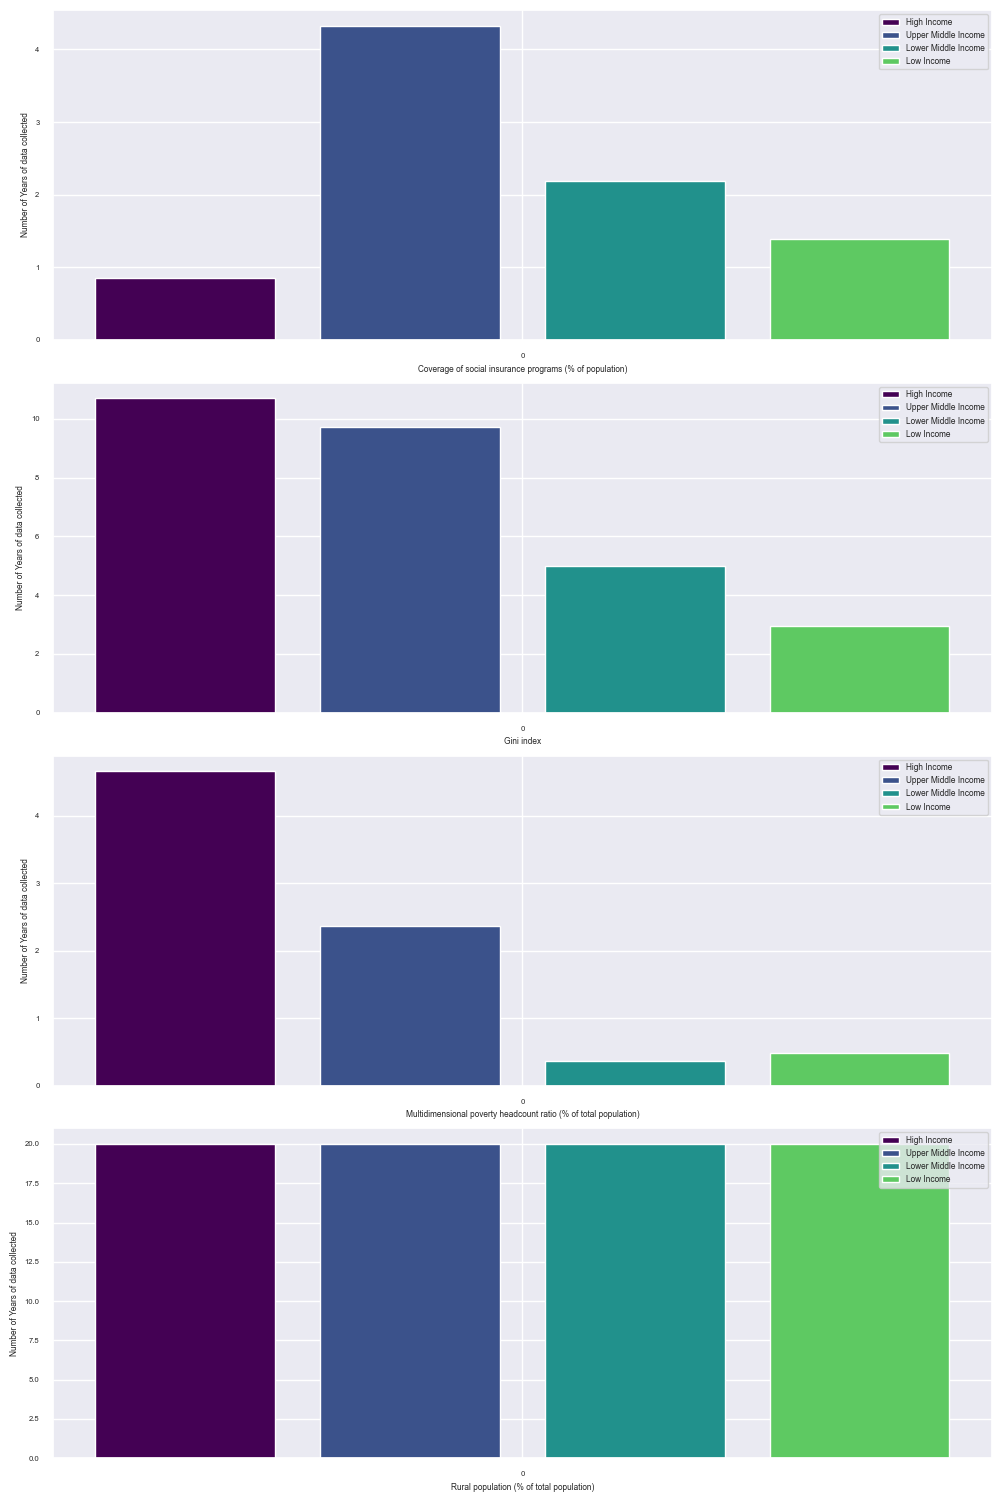

In [47]:
plot_series(average_indicator_values_high_income_poverty,average_indicator_values_umi_income_poverty,average_indicator_values_lmi_income_poverty,average_indicator_values_low_income_poverty)

In [48]:
df_high_income,df_umi_income,df_lmi_income,df_low_income = get_df(demographic_indicators)
average_indicator_values_high_income_demographic= find_empty_indicator_values(df_high_income)
average_indicator_values_umi_income_demographic = find_empty_indicator_values(df_umi_income)
average_indicator_values_lmi_income_demographic = find_empty_indicator_values(df_lmi_income)
average_indicator_values_low_income_demographic = find_empty_indicator_values(df_low_income)

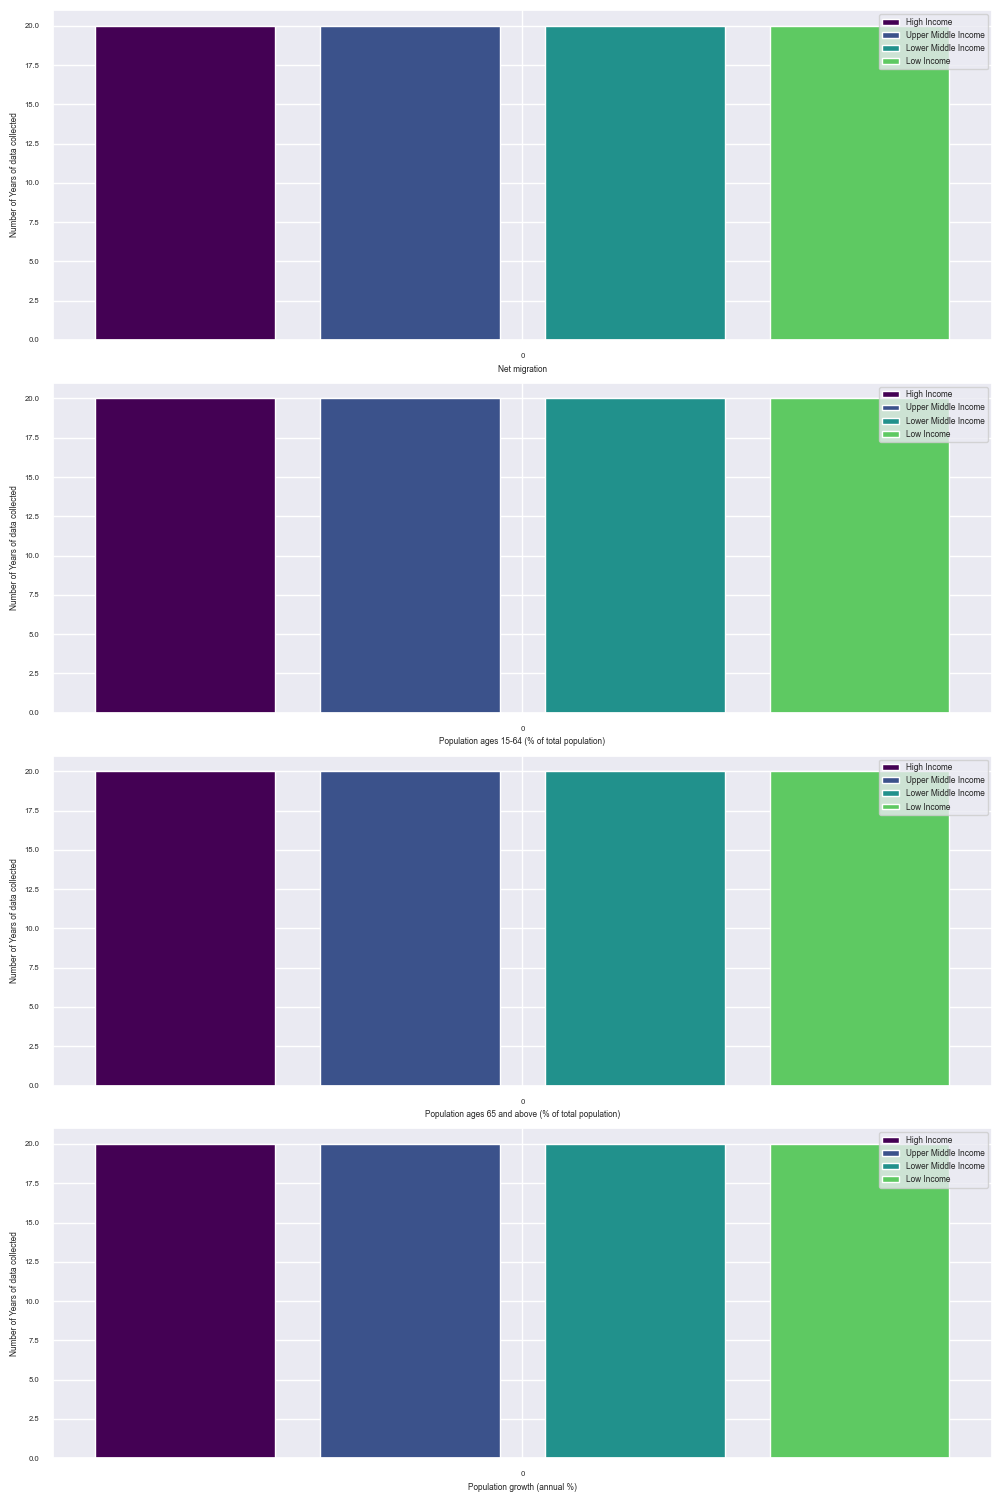

In [49]:
plot_series(average_indicator_values_high_income_demographic,average_indicator_values_umi_income_demographic,average_indicator_values_lmi_income_demographic,average_indicator_values_low_income_demographic)

In [50]:
df_high_income,df_umi_income,df_lmi_income,df_low_income = get_df(education_indicators)
average_indicator_values_high_income_education = find_empty_indicator_values(df_high_income)
average_indicator_values_umi_income_education = find_empty_indicator_values(df_umi_income)
average_indicator_values_lmi_income_education = find_empty_indicator_values(df_lmi_income)
average_indicator_values_low_income_education = find_empty_indicator_values(df_low_income)

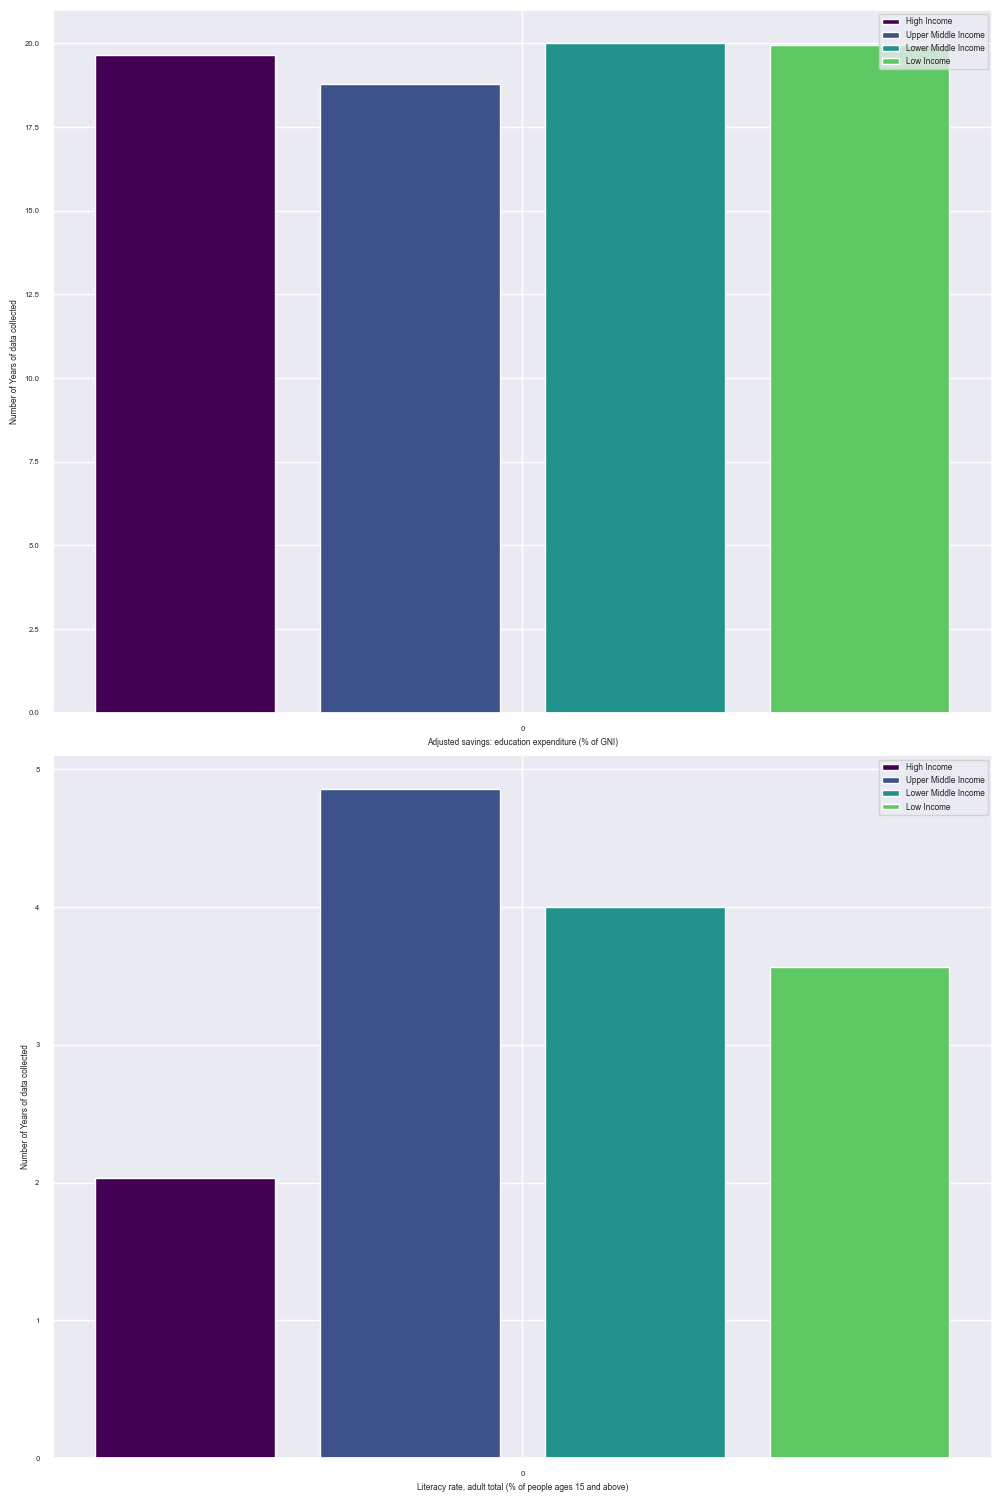

In [51]:
plot_series(average_indicator_values_high_income_education,average_indicator_values_umi_income_education,average_indicator_values_lmi_income_education,average_indicator_values_low_income_education)

In [52]:
df_high_income,df_umi_income,df_lmi_income,df_low_income = get_df(labor_indicators)
average_indicator_values_high_income_labor = find_empty_indicator_values(df_high_income)
average_indicator_values_umi_income_labor = find_empty_indicator_values(df_umi_income)
average_indicator_values_lmi_income_labor = find_empty_indicator_values(df_lmi_income)
average_indicator_values_low_income_labor = find_empty_indicator_values(df_low_income)

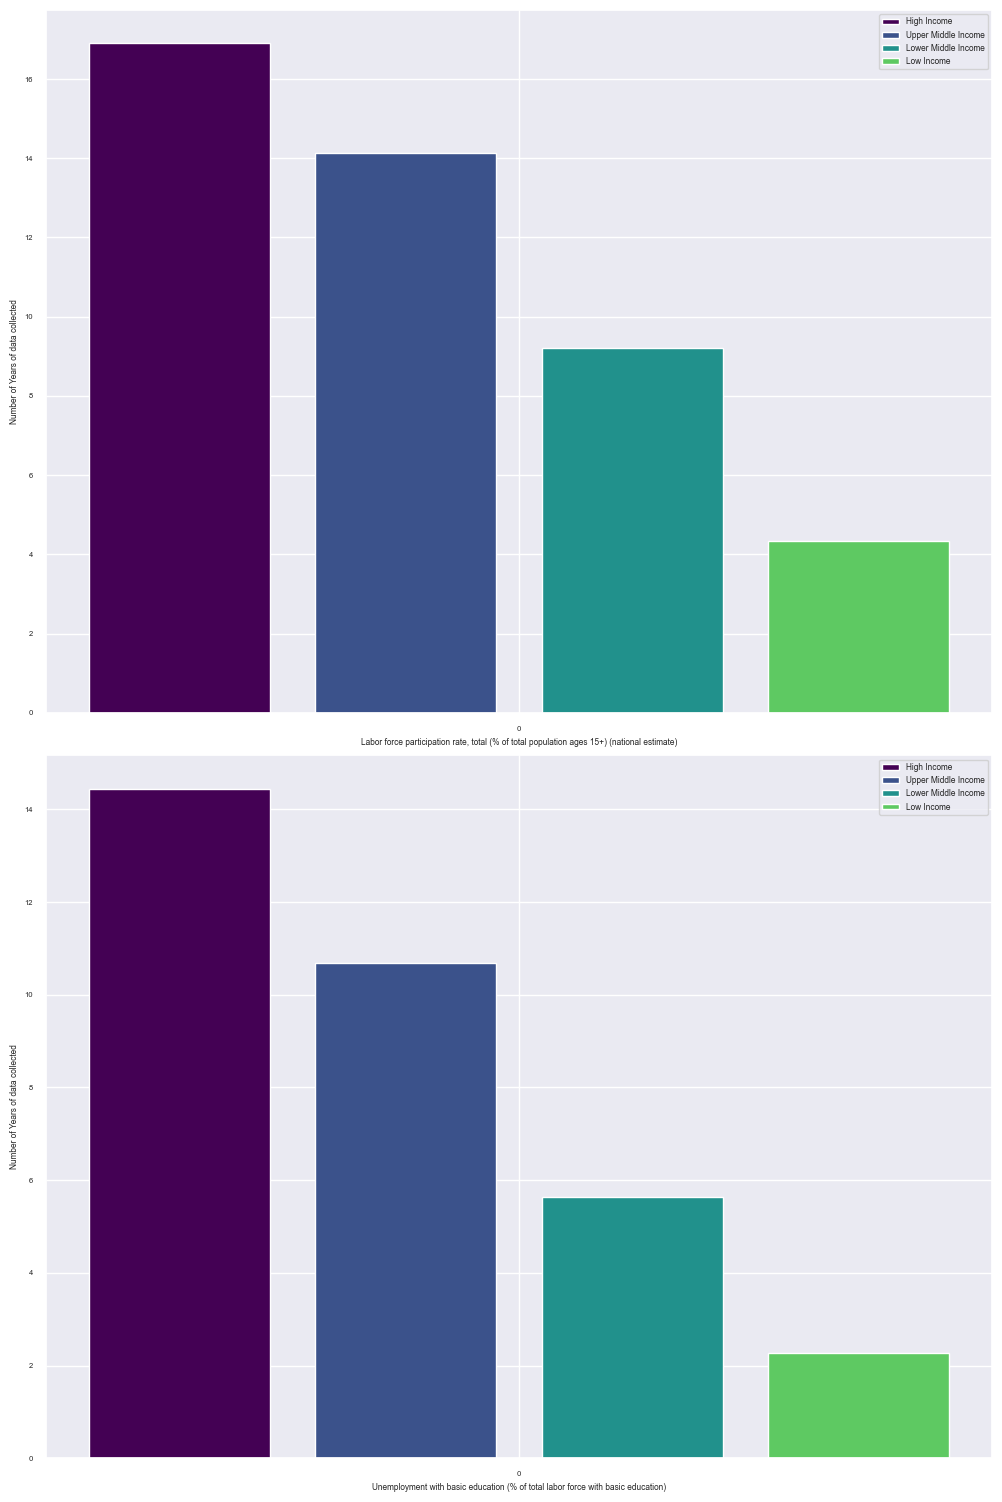

In [53]:
plot_series(average_indicator_values_high_income_labor ,average_indicator_values_umi_income_labor ,average_indicator_values_lmi_income_labor ,average_indicator_values_low_income_labor)

In [54]:
df_high_income,df_umi_income,df_lmi_income,df_low_income = get_df(trade_indicators)
average_indicator_values_high_income_trade = find_empty_indicator_values(df_high_income)
average_indicator_values_umi_income_trade = find_empty_indicator_values(df_umi_income)
average_indicator_values_lmi_income_trade = find_empty_indicator_values(df_lmi_income)
average_indicator_values_low_income_trade = find_empty_indicator_values(df_low_income)

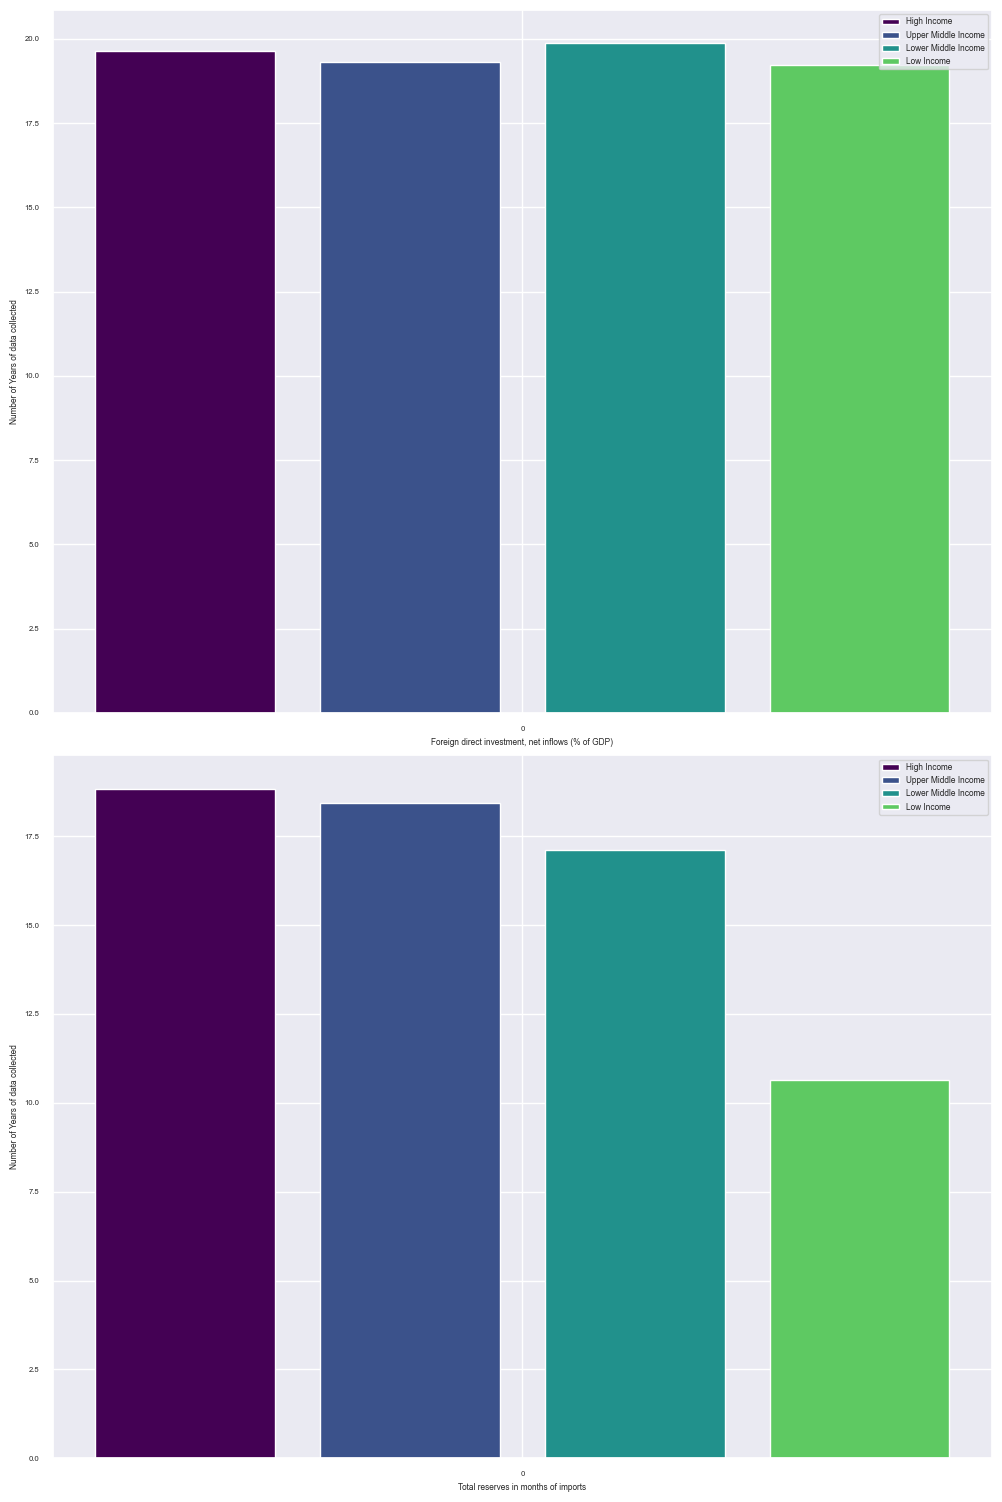

In [55]:
plot_series(average_indicator_values_high_income_trade ,average_indicator_values_umi_income_trade ,average_indicator_values_lmi_income_trade,average_indicator_values_low_income_trade)